In [ ]:
Group no:1
    Ameya Srivastava
    Ananya
Project: Covid-19 detection from chest X-ray using CNN

In [1]:
import shutil

In [2]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt 

In [3]:
#Going through meta data csv file

In [4]:
covid_imgs = pd.read_excel("COVID-19_Radiography_Dataset/COVID.metadata.xlsx",engine='openpyxl')

covid_imgs.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [5]:
opacity_images = pd.read_excel("COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx", engine = 'openpyxl')
opacity_images.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [6]:
normal_images = pd.read_excel("./COVID-19_Radiography_Dataset/Normal.metadata.xlsx", engine ='openpyxl')
normal_images.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [7]:
pneumonia_images = pd.read_excel("./COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx", engine = 'openpyxl')
pneumonia_images.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [8]:
#Working with the images

In [9]:
ROOT_DIR = "C:/Users/ameya/Desktop/Covid_detection_CNN-master/COVID-19_Radiography_Dataset/"
imgs = ['COVID','Lung_Opacity','Normal','Viral Pneumonia']

NEW_DIR = "C:/Users/ameya/Desktop/Covid_detection_CNN-master/any_images/"

In [10]:
#ROOT_DIR = "/content/COVID-19_Radiography_Dataset/"
#imgs = ['COVID','Lung_Opacity','Normal','Viral Pneumonia']

#NEW_DIR = "/content/al_images/"

In [11]:
# Copy all my images to a new folder i.e all_images
import os
if not os.path.exists(NEW_DIR):
  os.makedirs(NEW_DIR,exist_ok=True)

  for i in imgs:
    org_dir = os.path.join(ROOT_DIR, i+"/")
    
    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)
      
else:
  print("Already Exist")

Already Exist


In [12]:
counter = {'COVID':0,'Lung_Opacity':0,'Normal':0,'Viral Pneumonia':0}

for image in imgs:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

# the number of images i have in each class
counter

{'COVID': 8, 'Lung_Opacity': 6012, 'Normal': 5492, 'Viral Pneumonia': 45}

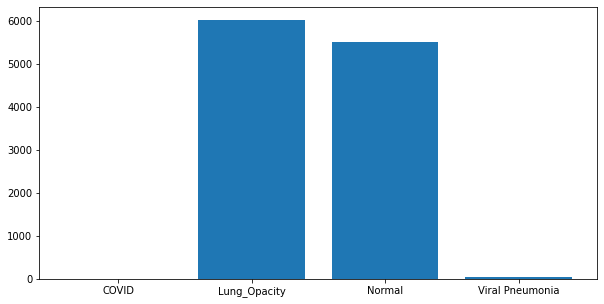

In [13]:
#visualizing the number of images 

plt.figure(figsize=(10,5))
plt.bar(x = counter.keys(), height= counter.values())
plt.show()

In [14]:
# First off we need to give equal amout of data for every class. 
# we will be Dividing our data between Train, Test, Validation

#Train Data: 
  #    Normal : 3500
  #     Lung Opacity : 3500 
  #      Covid+ Pneumonia : 3000 + 500

#Validation Data:
 #       Normal : 1000
 #      Lung Opacity : 1000
 #       Covid + Pneumonia : 500 +500

#Test Data:
  #      Normal : 1000
  #      Lung Opacity : 1000
  #      Covid + Pneumonia : 100 +500

In [15]:
if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")

  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")

  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")


  # Train Data
  for i in np.random.choice(replace= False , size= 3000 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 3900 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 900 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  # Validation Data
  for i in np.random.choice(replace= False , size= 308 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 500 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  # Test Data
  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

 

In [16]:
train_path  = "C:/Users/ameya/Desktop/Covid_detection_CNN-master/any_images/train_test_split/train"
valid_path  = "C:/Users/ameya/Desktop/Covid_detection_CNN-master/any_images/train_test_split/validation"
test_path   = "C:/Users/ameya/Desktop/Covid_detection_CNN-master/any_images/train_test_split/test"

In [17]:
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [18]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input, 
                                    zoom_range= 0.2, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    
                                    )

train = train_data_gen.flow_from_directory(directory= train_path, 
                                           target_size=(224,224))

Found 7800 images belonging to 2 classes.


In [19]:
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input  )

valid = validation_data_gen.flow_from_directory(directory= valid_path, 
                                                target_size=(224,224))

Found 1008 images belonging to 2 classes.


In [20]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path , 
                                          target_size=(224,224), 
                                          shuffle= False)

Found 800 images belonging to 2 classes.


In [21]:
# Covid +ve X-Ray is represented by 0 and Normal is represented by 1

class_type = {0:'Covid',  1 : 'Normal'}

In [22]:
# to visualize the images in the traing data denerator 

t_img , label = train.next()

In [23]:
# function when called will plot the images 

def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


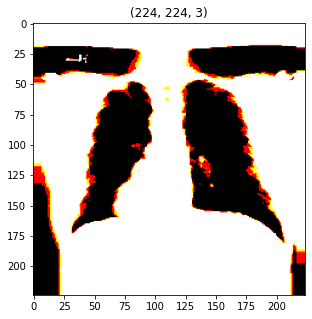

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


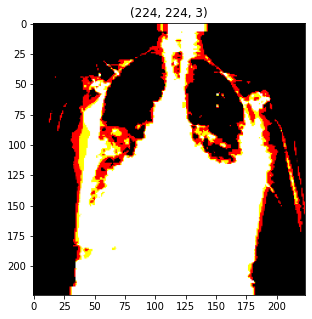

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


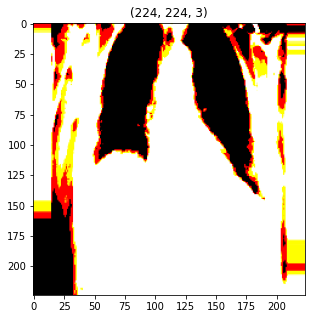

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


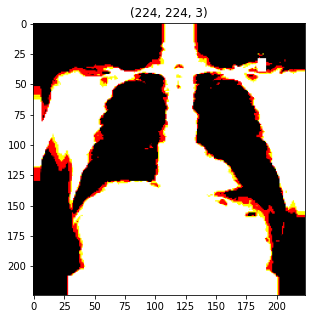

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


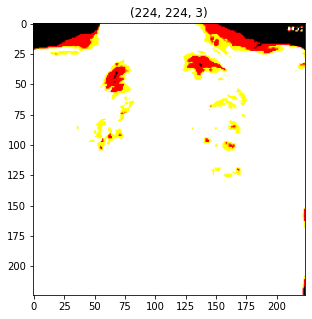

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


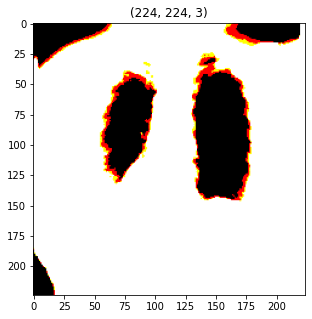

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


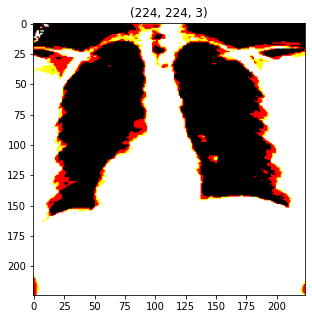

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


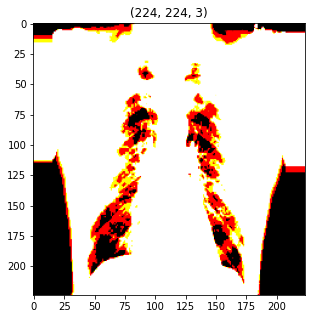

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


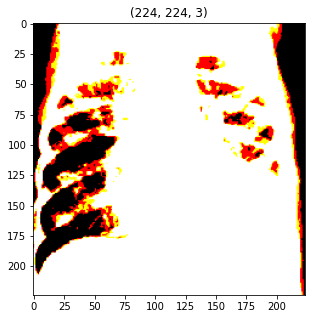

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


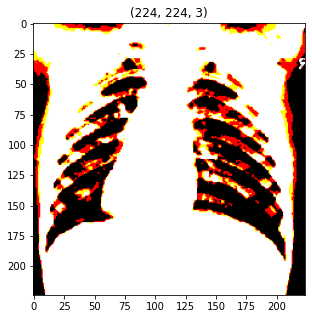

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


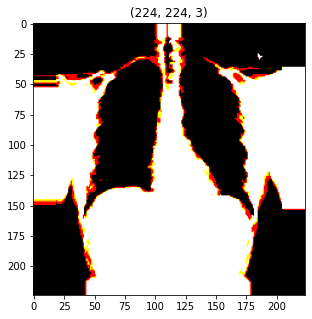

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


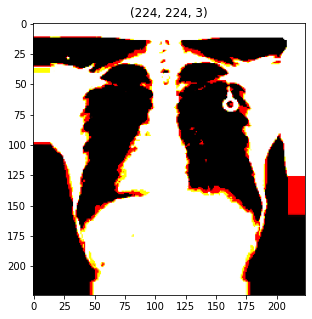

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


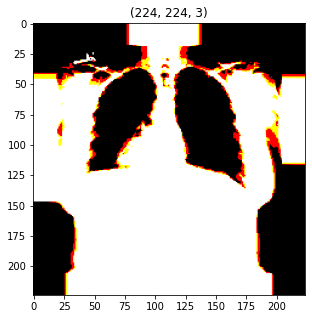

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


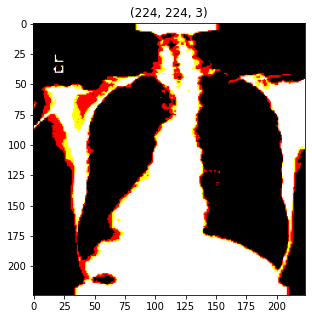

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


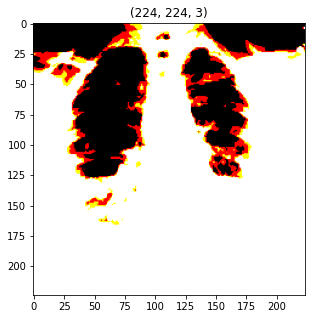

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


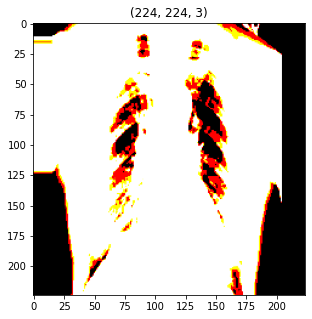

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


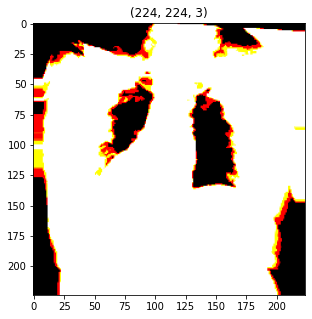

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


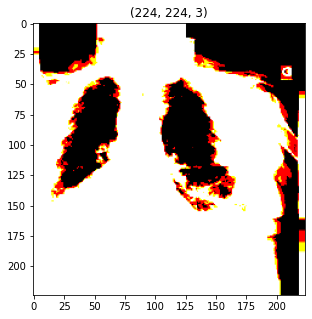

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


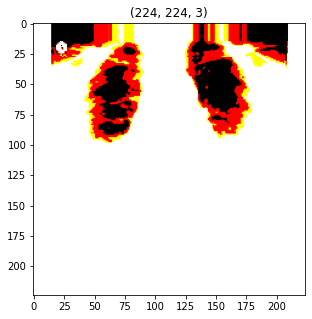

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


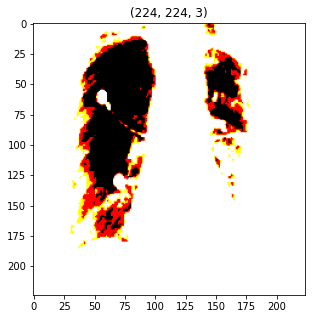

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


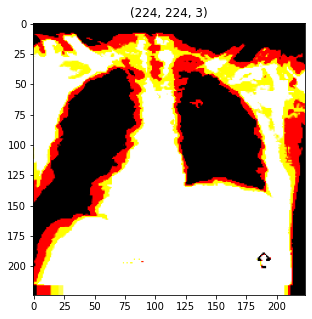

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


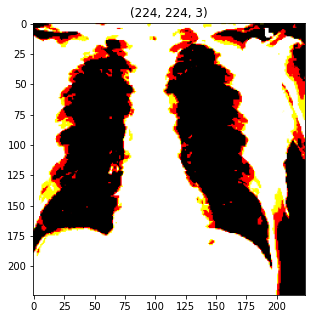

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


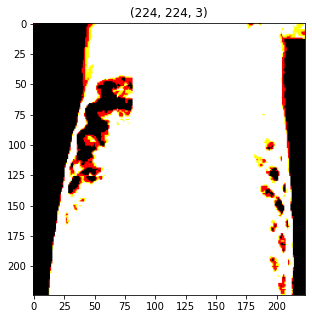

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


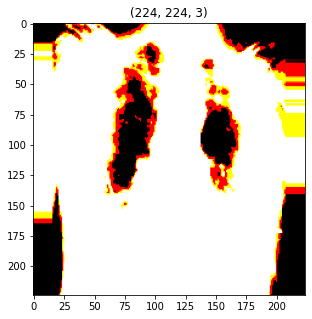

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


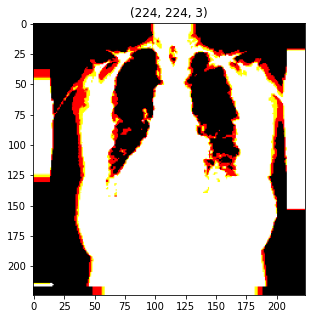

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


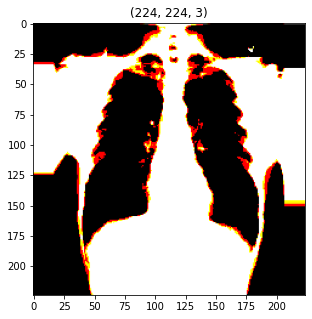

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


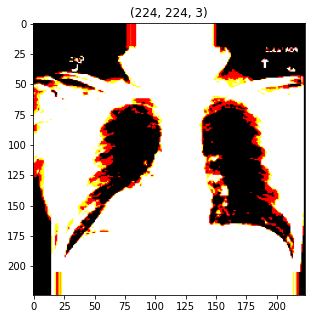

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


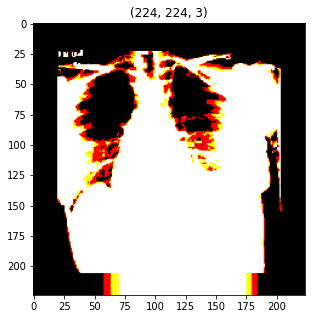

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


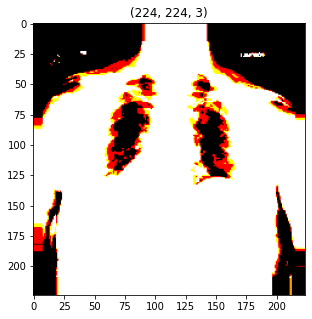

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


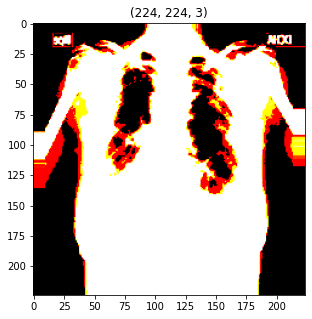

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


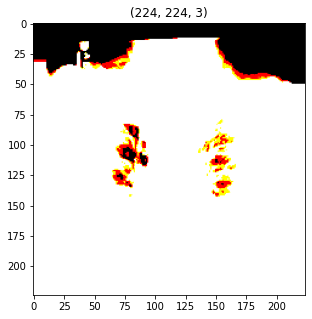

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


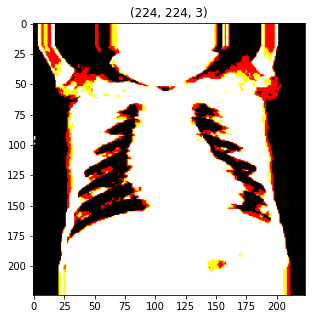

In [24]:
# function call to plot the images 

plotImages(t_img, label)

In [25]:
#from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

import tensorflow as tf

from keras.layers import Flatten , Dense, Dropout , MaxPool2D
print(1)

1


In [26]:
res = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(224,224,3),
)
print(1)
#res = ResNet50( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights

1


In [27]:
for layer in res.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [28]:
import numpy as np
from tqdm import tqdm
import math
import os

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
K.clear_session()
import itertools
import matplotlib.pyplot as plt
import cv2
import matplotlib.cm as cm

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import tensorflow as tf
res = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(224,224,3),
)




In [29]:
for layer in res.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [30]:
x = Flatten(name="Flatten")(res.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

# creating our model.
model = Model(res.input, x)

In [31]:

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [32]:
model.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [33]:
# implementing early stopping and model check point 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [34]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 16, callbacks=[es,mc])

C:\Users\ameya\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
10/10 [==============================] - 33s 2s/step - loss: 12.4136 - accuracy: 0.5594 - val_loss: 4.7897 - val_accuracy: 0.8047

Epoch 00001: val_accuracy improved from -inf to 0.80469, saving model to bestmodel.h5


C:\Users\ameya\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
10/10 [==============================] - 16s 2s/step - loss: 5.4741 - accuracy: 0.7781 - val_loss: 3.3968 - val_accuracy: 0.8633

Epoch 00002: val_accuracy improved from 0.80469 to 0.86328, saving model to bestmodel.h5
Epoch 3/30
10/10 [==============================] - 20s 2s/step - loss: 2.8057 - accuracy: 0.8375 - val_loss: 3.8731 - val_accuracy: 0.8184

Epoch 00003: val_accuracy did not improve from 0.86328
Epoch 4/30
10/10 [==============================] - 16s 2s/step - loss: 4.0210 - accuracy: 0.7969 - val_loss: 2.4178 - val_accuracy: 0.8691

Epoch 00004: val_accuracy improved from 0.86328 to 0.86914, saving model to bestmodel.h5
Epoch 5/30
10/10 [==============================] - 16s 2s/step - loss: 3.4077 - accuracy: 0.8375 - val_loss: 2.2477 - val_accuracy: 0.8418

Epoch 00005: val_accuracy did not improve from 0.86914
Epoch 00005: early stopping


In [35]:
## load only the best model 
from keras.models import load_model
model = load_model("bestmodel.h5")

In [36]:
#Seeing how our model has performed

In [37]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

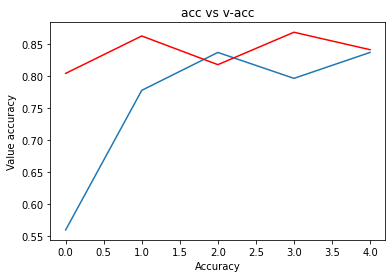

In [38]:
plt.plot(h['accuracy'])

plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.xlabel("Accuracy")
plt.ylabel("Value accuracy")
plt.show()

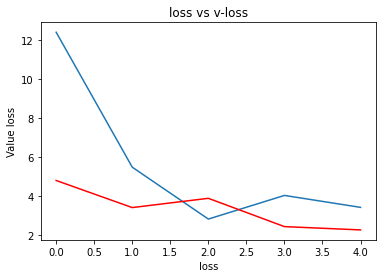

In [39]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.xlabel("loss")
plt.ylabel("Value loss")
plt.title("loss vs v-loss")
plt.show()

In [40]:
# checking out the accurscy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc} %")

C:\Users\ameya\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


The accuracy of your model is = 0.8537499904632568 %


In [41]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

The given X-Ray image is of type = Covid

The chances of image being Covid is : 99.99998807907104 percent

The chances of image being Normal is : 9.893381047731964e-06 percent


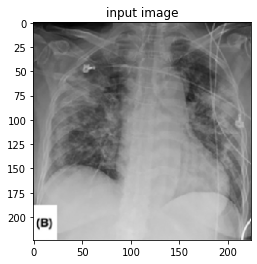

In [42]:
# path for that new image. ( you can take it either from google or any other scource)

path = "C:/Users/ameya/Desktop/COVID-96.png"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")


# to display the image  
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()